In [12]:
from tsai.basics import *
from sklearn.preprocessing import StandardScaler
from tsai.metrics import mape
from sktime.forecasting.model_selection import temporal_train_test_split

# ts = get_forecasting_time_series("Sunspots").values
ts = get_long_term_forecasting_data("ETTh1")
ts = ts[ts.columns[1:]]

scaler = StandardScaler()
scaler.fit(ts)
ts = scaler.transform(ts)



In [13]:
# X, y = SlidingWindow(60, horizon=1)(ts)
import pandas as pd
ts_df = pd.DataFrame(ts)
y_train, y_test = temporal_train_test_split(ts_df, test_size=0.2)



In [14]:
y_train.shape

(13936, 7)

In [15]:
from sktime.datasets import load_airline
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.theta import ThetaForecaster
from sktime.forecasting.exp_smoothing import ExponentialSmoothing # Holt-Winters
from sktime.forecasting.arima import ARIMA
from sktime.forecasting.ets import AutoETS
from sktime.forecasting.sarimax import SARIMAX
from sktime.forecasting.fbprophet import Prophet
from sktime.forecasting.compose import BaggingForecaster
from sktime.forecasting.trend import TrendForecaster
from sktime.forecasting.trend import PolynomialTrendForecaster
from sktime.forecasting.trend import STLForecaster
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.compose import EnsembleForecaster
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error


In [16]:
# y = load_airline()
# y_train, y_test = temporal_train_test_split(y)
fh = ForecastingHorizon(y_test.index, is_relative=False)
# forecaster = ExponentialSmoothing()
# forecaster = ARIMA()
# forecaster = SARIMAX()
# forecaster = AutoETS()
# forecaster = Prophet() # no
# forecaster = BaggingForecaster()
# forecaster = TrendForecaster()
# forecaster = PolynomialTrendForecaster()
# forecaster = STLForecaster()

forecasters = [
    ("trend", PolynomialTrendForecaster()),
    ("naive", NaiveForecaster())
]
forecaster = EnsembleForecaster(forecasters=forecasters)

forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
mape = mean_absolute_percentage_error(y_test, y_pred)

In [17]:
mape

8.833451684361588

In [68]:
y = load_airline()
y_train, y_test = temporal_train_test_split(y)


Dataset: Sunspots
downloading data...
...done. Path = data\forecasting\Sunspots.csv


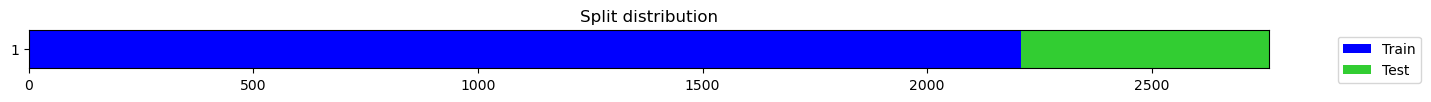

epoch,train_loss,valid_loss,mape,time
0,3447.374756,8947.120117,0.982192,00:31
1,3405.660645,8778.418945,0.973417,00:28
2,3370.450195,8454.138672,0.964274,00:28
3,3301.020020,7844.932129,0.963795,00:28
4,3208.566895,6666.818848,1.004437,00:28
5,3072.238037,4881.173340,1.282239,00:29
6,2895.897461,3359.535156,1.754776,00:31
7,2693.151611,2405.396484,2.271518,00:28
8,2474.176270,1799.197998,2.531891,00:31


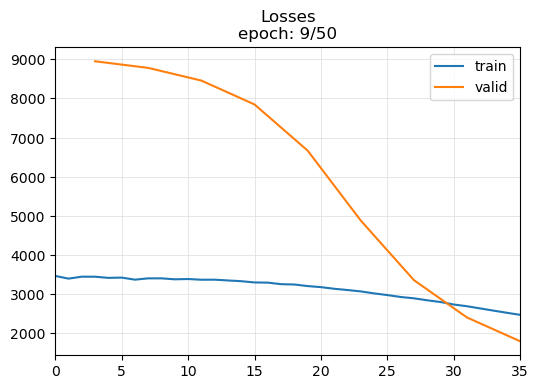

In [49]:
ts = get_forecasting_time_series("Sunspots").values
X, y = SlidingWindow(60, horizon=1)(ts)
splits = TimeSplitter(0.2)(y)
tfms = [None, TSForecasting()]
batch_tfms = TSStandardize()
fcst = TSForecaster(X, y, splits=splits, path='models', tfms=tfms,
batch_tfms= batch_tfms, bs=512, arch="TSTPlus", metrics=mape, cbs=ShowGraph())
fcst.fit_one_cycle(50, 1e-3)


In [1]:
from tsai.basics import *


In [4]:
# AirQualityUCI handcraft 
print(long_term_forecasting_list) # ETT
print(Monash_forecasting_list) # M4, NN5, torism
print(UCR_multivariate_list) # PEMS-SF
# Weathre2k
# VISUELLE2.0



['ETTh1', 'ETTh2', 'ETTm1', 'ETTm2', 'electricity', 'exchange_rate', 'traffic', 'weather', 'ILI']
['m1_yearly_dataset', 'm1_quarterly_dataset', 'm1_monthly_dataset', 'm3_yearly_dataset', 'm3_quarterly_dataset', 'm3_monthly_dataset', 'm3_other_dataset', 'm4_yearly_dataset', 'm4_quarterly_dataset', 'm4_monthly_dataset', 'm4_weekly_dataset', 'm4_daily_dataset', 'm4_hourly_dataset', 'tourism_yearly_dataset', 'tourism_quarterly_dataset', 'tourism_monthly_dataset', 'nn5_daily_dataset_with_missing_values', 'nn5_daily_dataset_without_missing_values', 'nn5_weekly_dataset', 'cif_2016_dataset', 'kaggle_web_traffic_dataset_with_missing_values', 'kaggle_web_traffic_dataset_without_missing_values', 'kaggle_web_traffic_weekly_dataset', 'solar_10_minutes_dataset', 'solar_weekly_dataset', 'electricity_hourly_dataset', 'electricity_weekly_dataset', 'london_smart_meters_dataset_with_missing_values', 'london_smart_meters_dataset_without_missing_values', 'wind_farms_minutely_dataset_with_missing_values', '

In [8]:
import os
os.environ["http_proxy"] = "http://127.0.0.1:7890"
os.environ["https_proxy"] = "http://127.0.0.1:7890" 
ts = get_long_term_forecasting_data("ETTh1")

,date,HUFL,HULL,MUFL,MULL,LUFL,LULL,OT
0,2016-07-01 00:00:00,5.827,2.009,1.599,0.462,4.203,1.340,30.531000
1,2016-07-01 01:00:00,5.693,2.076,1.492,0.426,4.142,1.371,27.787001
2,2016-07-01 02:00:00,5.157,1.741,1.279,0.355,3.777,1.218,27.787001
3,2016-07-01 03:00:00,5.090,1.942,1.279,0.391,3.807,1.279,25.044001
4,2016-07-01 04:00:00,5.358,1.942,1.492,0.462,3.868,1.279,21.948000
...,...,...,...,...,...,...,...,...
17415,2018-06-26 15:00:00,-1.674,3.550,-5.615,2.132,3.472,1.523,10.904000
17416,2018-06-26 16:00:00,-5.492,4.287,-9.132,2.274,3.533,1.675,11.044000
17417,2018-06-26 17:00:00,2.813,3.818,-0.817,2.097,3.716,1.523,10.271000
17418,2018-06-26 18:00:00,9.243,3.818,5.472,2.097,3.655,1.432,9.778000
